In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import ConfusionMatrixDisplay

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
x = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(x_train)

tensor([[  7.0000, 184.0000,  84.0000,  ...,  35.5000,   0.3550,  41.0000],
        [  6.0000,  85.0000,  78.0000,  ...,  31.2000,   0.3820,  42.0000],
        [  2.0000, 106.0000,  64.0000,  ...,  30.5000,   1.4000,  34.0000],
        ...,
        [  1.0000,  97.0000,  70.0000,  ...,  38.1000,   0.2180,  30.0000],
        [  6.0000, 190.0000,  92.0000,  ...,  35.5000,   0.2780,  66.0000],
        [  4.0000, 144.0000,  58.0000,  ...,  29.5000,   0.2870,  37.0000]])


In [4]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [5]:
torch.manual_seed(42)

ann = ANN_Model()

In [7]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann.parameters(), lr = 0.01)

In [8]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(x_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 with loss 1.1355785131454468
Epoch number: 11 with loss 0.6555917263031006
Epoch number: 21 with loss 0.6423345804214478
Epoch number: 31 with loss 0.6323480606079102
Epoch number: 41 with loss 0.6244558691978455
Epoch number: 51 with loss 0.6166166067123413
Epoch number: 61 with loss 0.605156660079956
Epoch number: 71 with loss 0.6429994702339172
Epoch number: 81 with loss 0.6007938385009766
Epoch number: 91 with loss 0.6042705178260803
Epoch number: 101 with loss 0.5974863767623901
Epoch number: 111 with loss 0.5940057635307312
Epoch number: 121 with loss 0.5889997482299805
Epoch number: 131 with loss 0.5859819054603577
Epoch number: 141 with loss 0.5827224850654602
Epoch number: 151 with loss 0.5776241421699524
Epoch number: 161 with loss 0.5744565725326538
Epoch number: 171 with loss 0.5721302032470703
Epoch number: 181 with loss 0.5692126750946045
Epoch number: 191 with loss 0.5691346526145935
Epoch number: 201 with loss 0.5695343017578125
Epoch number: 211 with lo

In [9]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(x_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

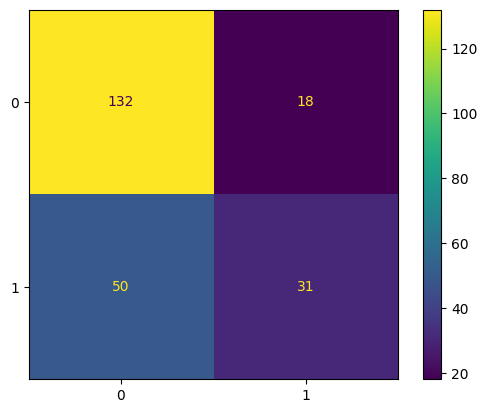

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

I used SGD which uses stochastic gradient descent and works with small batches in order to have a smaller computational workload. SGD correctly predicted more of the 0 outcome than Adam did. SGD generally had a higher loss in each epoch than Adam did. I think this is because of the aforementioned small batches instead of using the entire dataset for each iteration.